<a href="https://colab.research.google.com/github/dmyneni98/Machine_Learning/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
/content/drive/My Drive
/content
     sl_no gender  ssc_p    ssc_b  ...  specialisation  mba_p      status    salary
0        1      M  67.00   Others  ...          Mkt&HR  58.80      Placed  270000.0
1        2      M  79.33  Central  ...         Mkt&Fin  66.28      Placed  200000.0
2        3      M  65.00  Central  ...         Mkt&Fin  57.80      Placed  250000.0
3        4      M  56.00  Central  ...          Mkt&HR  59.43  Not Placed       NaN
4        5      M  85.80  Central  ...         Mkt&Fin  55.50      Placed  425000.0
..     ...    ...    ...      ...  ...             ...    ...         ...       ...
210    211      M  80.60   Others  ...         Mkt&Fin  74.49      Placed  400000.0
211    212      M  58.00   Others  ...         Mkt&Fin  53.62      Placed  275000.0
212    213      M  67.00   Others  ...         Mkt&Fin  69.72      Placed  295000.0
213    214      F  74.00   Others  ...          Mkt&HR  60.23      Placed  204000.0
214    215      M

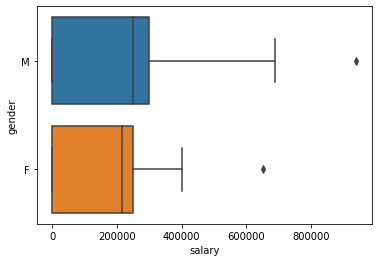

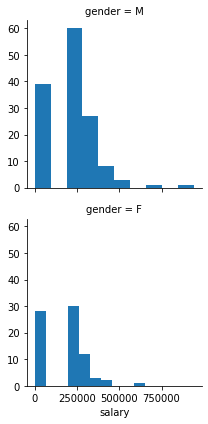

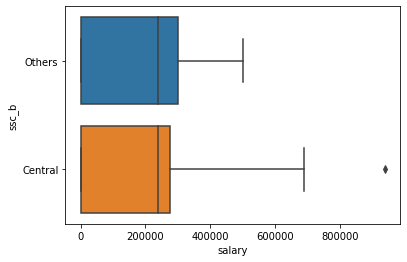

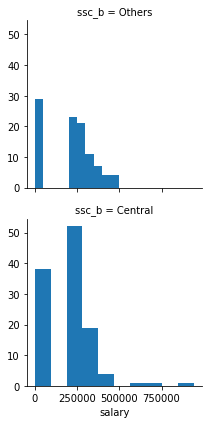

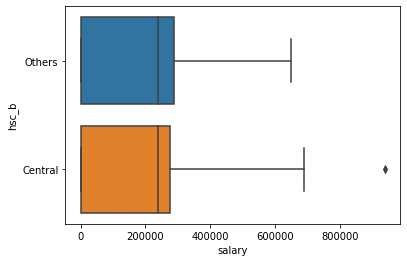

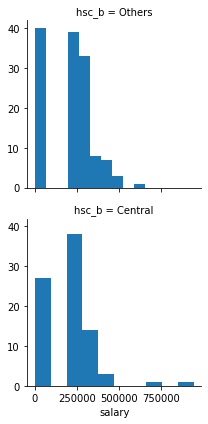

Pearsons correlation: 0.511
{'degree_p', 'hsc_p', 'ssc_p', 'salary'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    object 
 3   hsc_b     215 non-null    object 
 4   hsc_p     215 non-null    float64
 5   degree_p  215 non-null    float64
 6   degree_t  215 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.9+ KB
gender
ssc_b
hsc_b
degree_t
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ssc_p      215 non-null    float64
 1   hsc_p      215 non-null    float64
 2   degree_p   215 non-null    float64
 3   F          215 non-null    uint8  
 4   Central    215 non-null    uint8  
 5   Centra

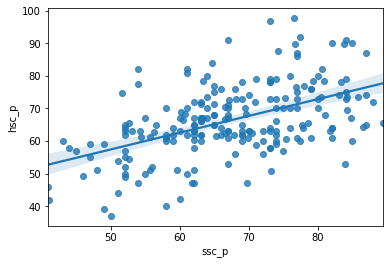

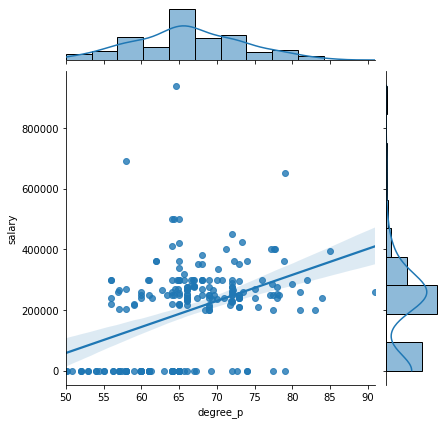

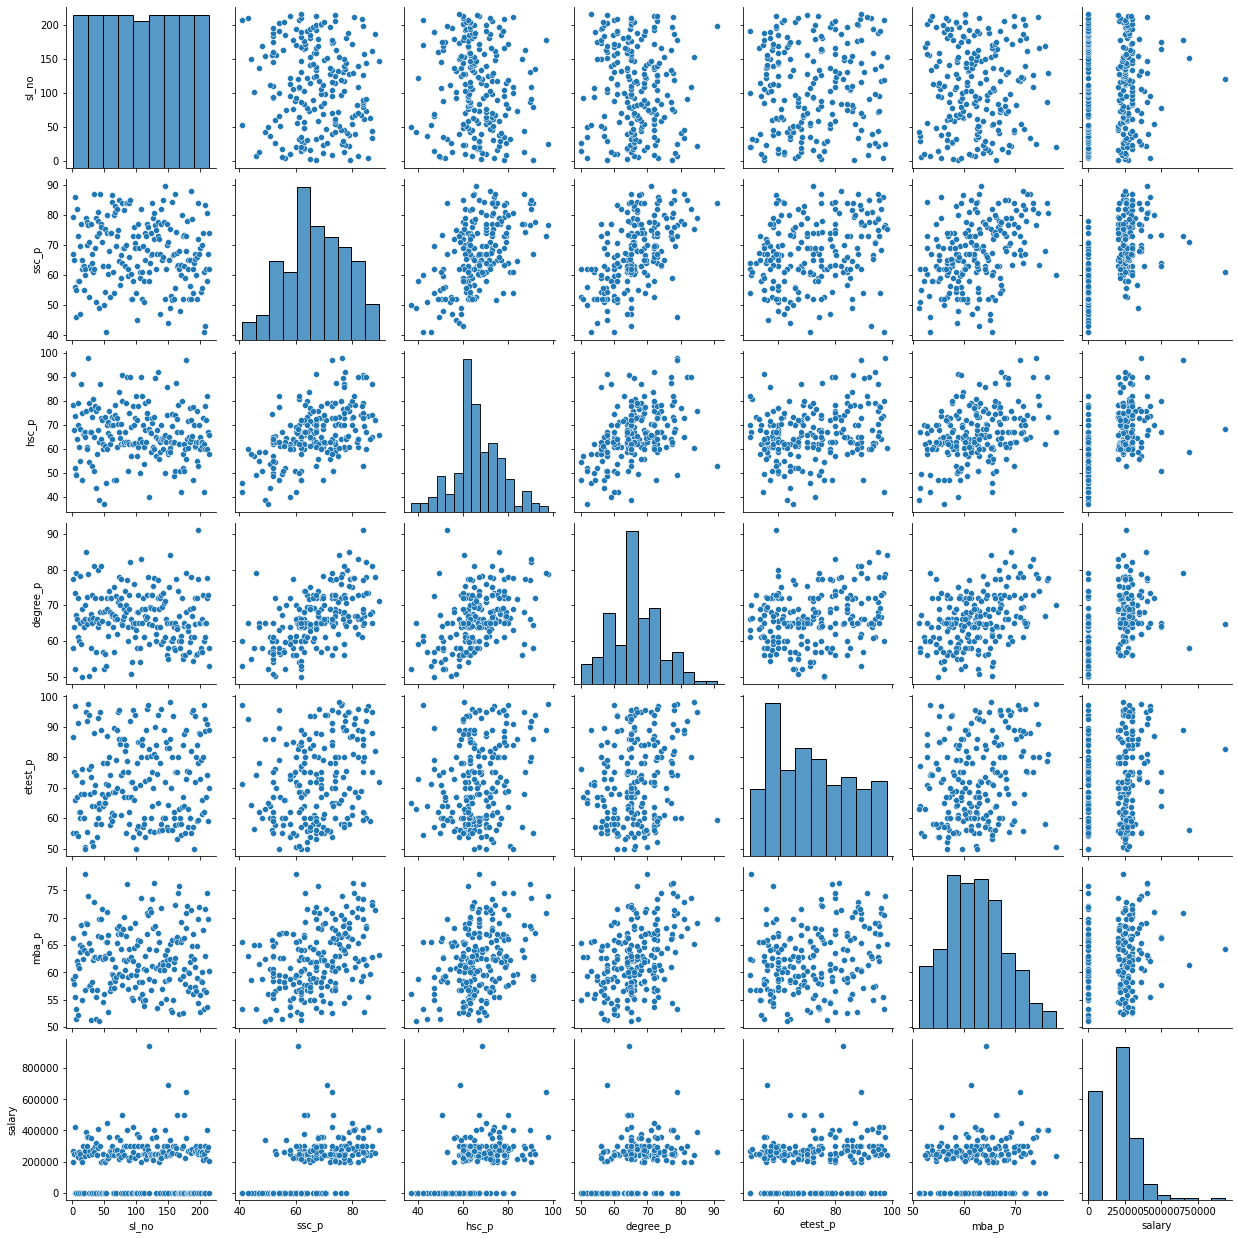

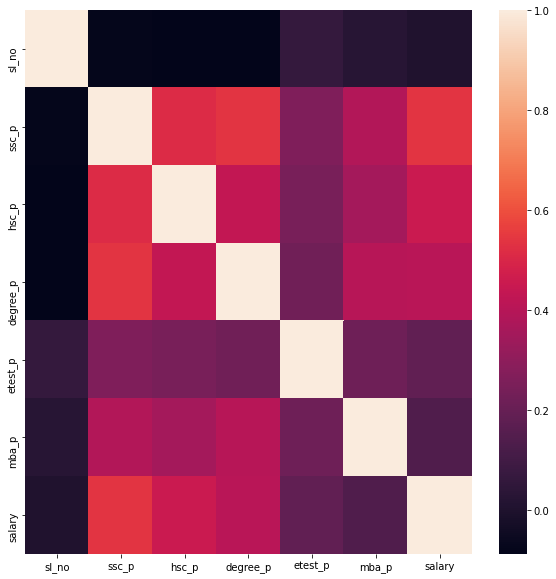

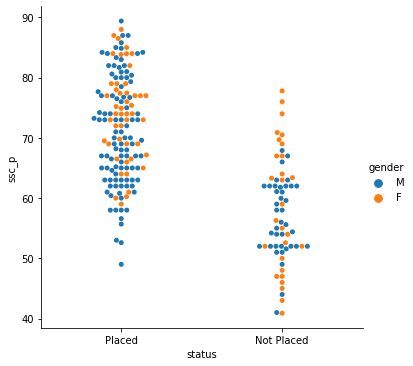

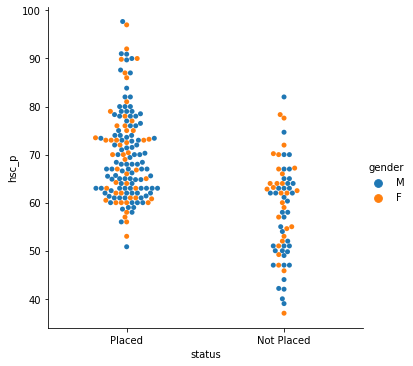

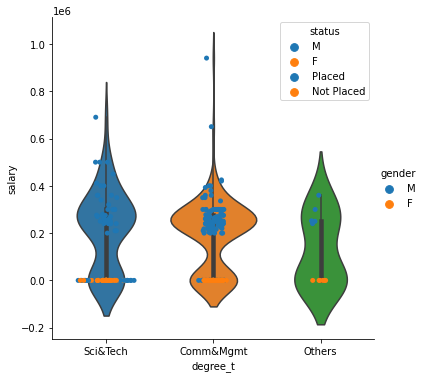

In [ ]:
# Machine Learning Final Project - James Sipowicz + Dhiraja Myneni

### Step 1: Mount to Google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter foldername in your Drive where you have saved the unzipped
# 'CampusRecruitmentInfo' folder containing the .csv with our data.
FOLDERNAME = 'CampusRecruitment'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../
%cd ../../

# load required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Tabular Data from .csv file into Pandas Dataframe
with open('/content/CampusRecruitment/Placement_Data_Full_Class.csv', newline='') as csvfile:
  campusData = pd.read_csv(csvfile)
print(campusData)
print(campusData.info())

# Set the data for comparison to 'salary'
campusData['salary'].fillna(0,inplace = True)

# Function to plot our data for comparison
def plot(data,x,y):
    plt.Figure(figsize =(10,10))
    sns.boxplot(x = data[x],y= data[y])
    g = sns.FacetGrid(data, row = y)
    g = g.map(plt.hist,x)
    plt.show()

# Plot salary difference based on gender
plot(campusData,"salary","gender")

# Plot placement based on gender
#sns.countplot(campusData['status'],hue=campusData['gender'])
# ? Not printing correctly on final run

# Plot salary based on 10th grade education background
plot(campusData,"salary","ssc_b")

# Plot salary based on 12th grade education background
plot(campusData,"salary","hsc_b")

# Did students who did well in 10th grade do well in 12th?
from scipy.stats import pearsonr
corr, _ = pearsonr(campusData['ssc_p'], campusData['hsc_p'])
print('Pearsons correlation: %.3f' % corr)
sns.regplot(x='ssc_p',y='hsc_p',data = campusData)

# Plot undergraduate degree grade with salary 
sns.jointplot(x="degree_p",y="salary", data=campusData ,kind= "reg")

# Pair Plot the relationships between numerical categories 
sns.pairplot(campusData)

# Create a heatmap to show which factors have the most effect on each other
plt.figure(figsize =(10,10))
sns.heatmap(campusData.corr())

# Plot the varying relationships between numerical columns
correlatedColumns =[]
cor = campusData.corr()
for i in cor.columns:
    for j in cor.columns :
        if abs(cor[i][j])>0.5 and i!=j:
            correlatedColumns.append(i)
            correlatedColumns.append(j)
print(set(correlatedColumns))

# Plot using cat-plots who is most likely not getting a placement
sns.catplot(x="status", y="ssc_p", data=campusData,kind="swarm",hue='gender')
sns.catplot(x="status", y="hsc_p", data=campusData,kind="swarm",hue='gender')
sns.catplot(x="status", y="degree_p", data=campusData,kind="swarm",hue='gender')

# Use a violin-plot in tandem with a strip plot to show which degree fields are most
# likely to be placed vs not likely to be placed.
sns.violinplot(x="degree_t", y="salary", data=campusData)
sns.stripplot(x="degree_t", y="salary", data=campusData,hue='status')

# MACHINE LEARNING

# First we need to get the most important columns to perform predictive analysis
columns_needed =['gender','ssc_p','ssc_b','hsc_b','hsc_p','degree_p','degree_t']
data_x = campusData[columns_needed]
data_x.info()

# Then, we have to convert the categorical values into numerical ones.
def cat_to_num(data_x,col):
    dummy = pd.get_dummies(data_x[col])
    del dummy[dummy.columns[-1]] #To avoid dummy variable trap
    data_x= pd.concat([data_x,dummy],axis = 1)
    return data_x

# Print out the catergorical values that have to be converted
for i in data_x.columns:
    if data_x[i].dtype ==object:
        print(i)
        data_x =cat_to_num(data_x,i)

# Drop data that can't be instantly converted
data_x.drop(['gender','ssc_b','hsc_b','degree_t'],inplace =True,axis =1)

# Using LabelEncoder, we'll transform the 'status' column into a (?) boolean type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
campusData['status'] = le.fit_transform(campusData['status'])

# Reassign our values
y = campusData['status']
x = data_x

# Display our type-transformed data set
x.info()

# Display our status column with boolean-assigned placement values
# ? Not displaying correctly
y.value_counts()

# Now we have to split our data into some training and testing datasets.
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x,y,test_size=0.2)

# Now comes the part we've all been waiting for... 
# We will be preforming Status prediction for prospective students (without salary)
# by utilizing Decision Tree Classification Machine Learning >:)
from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC()
model.fit(X_train,y_train)

# Use an accuracy-score package to determine how accurate our Decision Tree is:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ')
print(accuracy_score(y_test,model.predict(X_test)))

# linear regression 
from sklearn import linear_model
train = campusData[:(int(len(campusData)*0.8))]
test = campusData[:(int(len(campusData)*0.8)):]

regression = linear_model.LinearRegression()
X_train = np.array(train[['ssc_p','hsc_p','degree_p']])
y_train = np.array(train[['status']])

regression.fit(X_train, y_train)
X_test = np.array(test[['ssc_p','hsc_p','degree_p']])
y_test = np.array(test[['status']])

Y_pred = regression.predict(X_test)

from sklearn.metrics import r2_score
R = r2_score(y_test, Y_pred)
print("R^2: ", R)

In [ ]:
##